In [2]:
import ccalnoir as ccal
import cuzcatlan as cusca
import pandas as pd
import os

In [3]:
def read_cls(file):
    with open(file) as f:
        f.readline()
        line = f.readline()
        vals = line.strip('\n').split(' ')
        print(f'0-->{vals[1]}\n1-->{vals[2]}')
        
    return

In [4]:
# This could be a for loop, but it is cleaner as a function
def create_subgroup_reports(subgroup, pearson=True,number_of_permutations=10):
    if not os.path.exists(f'results/{subgroup}'):
        os.makedirs(f'results/{subgroup}')
    if pearson:
        print('============================================')
        print('==> Using Pearson correlation as the "Score"')
        print('============================================')
        ccal.differential_gene_expression(gene_expression='results/pdx_drug_scores.gct',
                                      phenotype_file=f'results/{subgroup}.cls',
                                      output_filename=f'results/{subgroup}/significance',
                                      ranking_method=cusca.custom_pearson_corr,
                                      number_of_permutations=number_of_permutations)
    else:
        print('================================================')
        print('==> Using Information Coefficient as the "Score"')
        print('================================================')
        ccal.differential_gene_expression(gene_expression='results/pdx_drug_scores.gct',
                                  phenotype_file=f'results/{subgroup}.cls',
                                  output_filename=f'results/{subgroup}/significance',
                                  ranking_method=cusca.information_coefficient,
                                  number_of_permutations=number_of_permutations)
    print('-----')
    read_cls(f'results/{subgroup}.cls')
    print('-----')
    significance = pd.read_table(f'results/{subgroup}/significance.match.txt',index_col=0)
    effective_drugs = significance[significance['Score']>0]
    effective_drugs.drop(['Score(0.95 MoE)'],axis=1,inplace=True)
    # load info for all drugs:
    pdx_df = pd.read_excel('results/drug_scores_for_all_pdx_models.xlsx')
    # Add MoAs to effective drug
    effective_drugs.insert(loc=0,column='MoA',value=pdx_df['moa'])
    #Saving individual results to a spreadsheet.
    effective_drugs.to_excel(f'results/{subgroup}/{subgroup}_effective_drugs_from_expression.xlsx')
    print(f'File named "results/{subgroup}/{subgroup}_effective_drugs_from_expression.xlsx" saved successfully!')
    print('-----')
    print("Effective drugs (i.e., drugs with Score>0)")
    display(effective_drugs)

In [5]:
def concatenate_subgroup_reports():
    """Assuming that individual reports exist!"""
    writer = pd.ExcelWriter('results/effective_drugs_from_expression.xlsx')
    for subgroup in ['G3','G4','SHH','SHH+p53']:  
        #Saving results to a sheet in a summary 
        effective_drugs = pd.read_excel(f'results/{subgroup}/{subgroup}_effective_drugs_from_expression.xlsx',index_col=0)
        effective_drugs.to_excel(writer,sheet_name=f'{subgroup}')
        print(f'Sheet named "{subgroup}" added successfully to file named "results/effective_drugs_from_expression.xlsx"!')
    writer.save()
    print("All done!")

In [6]:
number_of_permutations = 100
pearson=True

==> Using Pearson correlation as the "Score"
Dropping 0 axis-1 slices ...
Computing match score with <function custom_pearson_corr at 0x7feaccc8d6a8> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 100 permutations ...
	1/100 ...
	11/100 ...
	21/100 ...
	31/100 ...
	41/100 ...
	51/100 ...
	61/100 ...
	71/100 ...
	81/100 ...
	91/100 ...
	100/100 - done.


No handles with labels found to put in legend.
No handles with labels found to put in legend.


-----------------------------------------------
The PDF of this heatmap can be downloaded here:



-----------------------------------------------
The TXT with the data displayed on the heatmap can be downloaded here:



-----------------------------------------------
done!


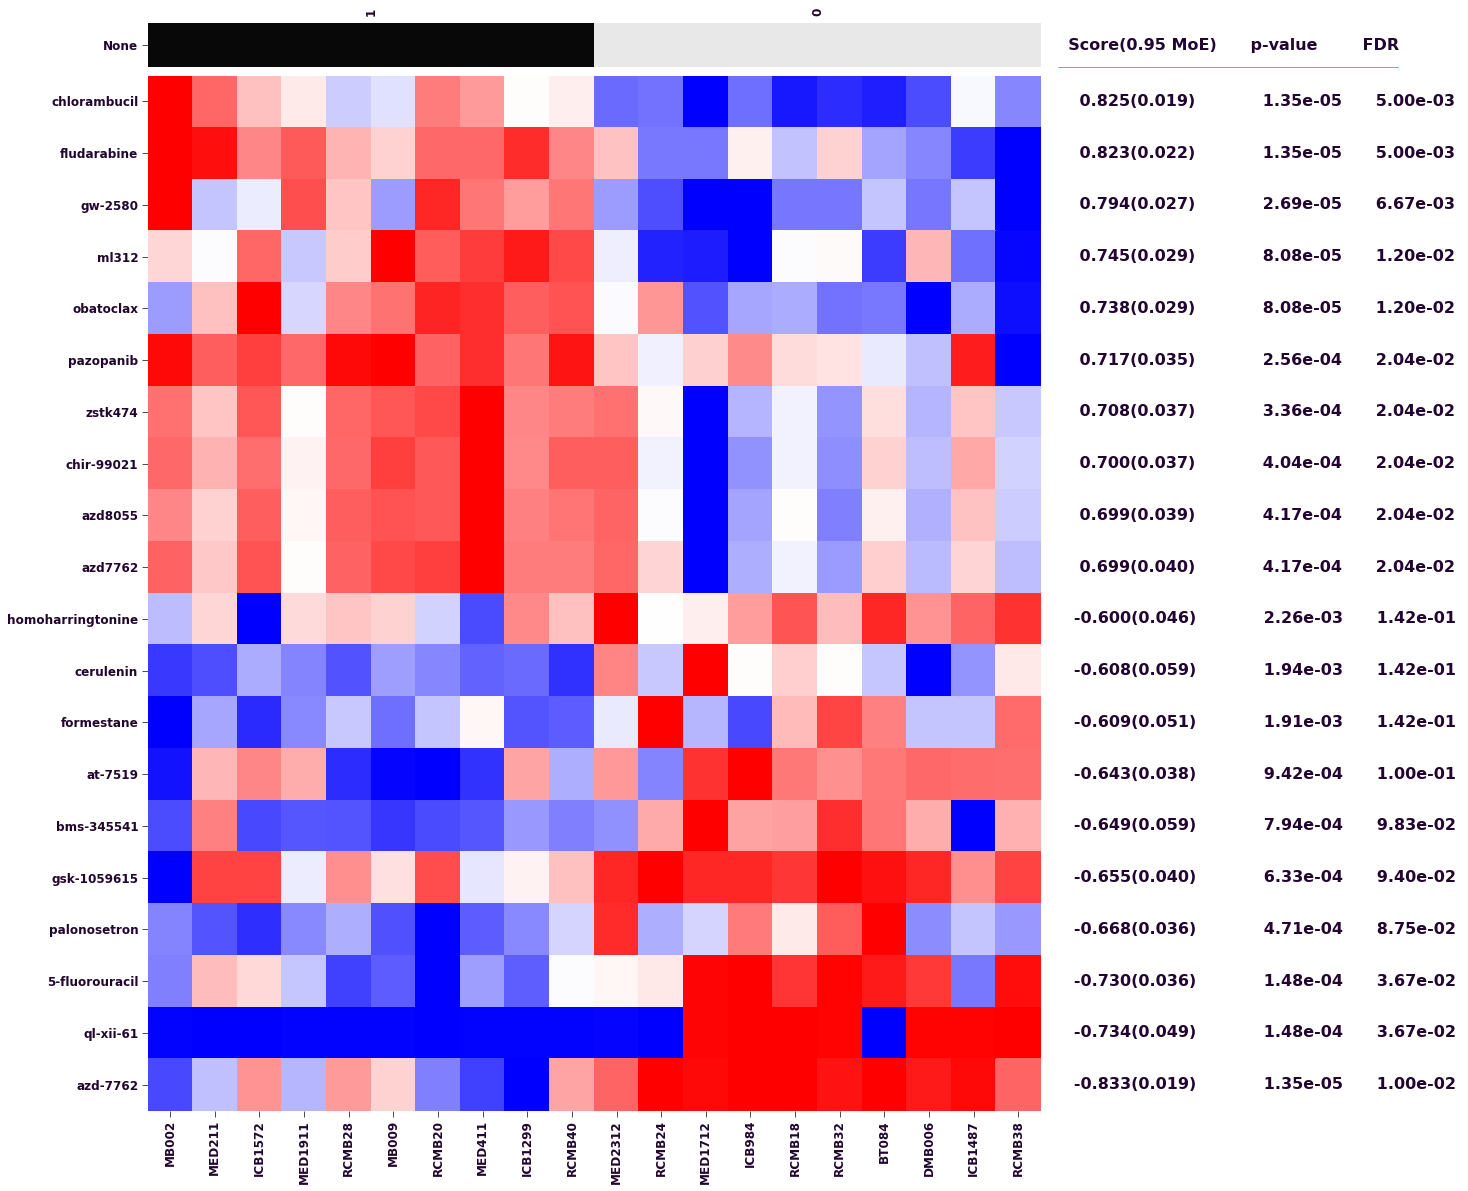

-----
0-->other
1-->G3
-----


FileNotFoundError: [Errno 2] No such file or directory: 'results/drug_scores_for_all_pdx_models.xlsx'

In [8]:
create_subgroup_reports(subgroup='G3', pearson=pearson, number_of_permutations=number_of_permutations)

==> Using Pearson correlation as the "Score"
Dropping 0 axis-1 slices ...
Computing match score with <function custom_pearson_corr at 0x7feaccc8d6a8> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 100 permutations ...
	1/100 ...
	11/100 ...
	21/100 ...
	31/100 ...
	41/100 ...
	51/100 ...
	61/100 ...
	71/100 ...
	81/100 ...
	91/100 ...
	100/100 - done.


No handles with labels found to put in legend.
No handles with labels found to put in legend.


-----------------------------------------------
The PDF of this heatmap can be downloaded here:



-----------------------------------------------
The TXT with the data displayed on the heatmap can be downloaded here:



-----------------------------------------------
done!


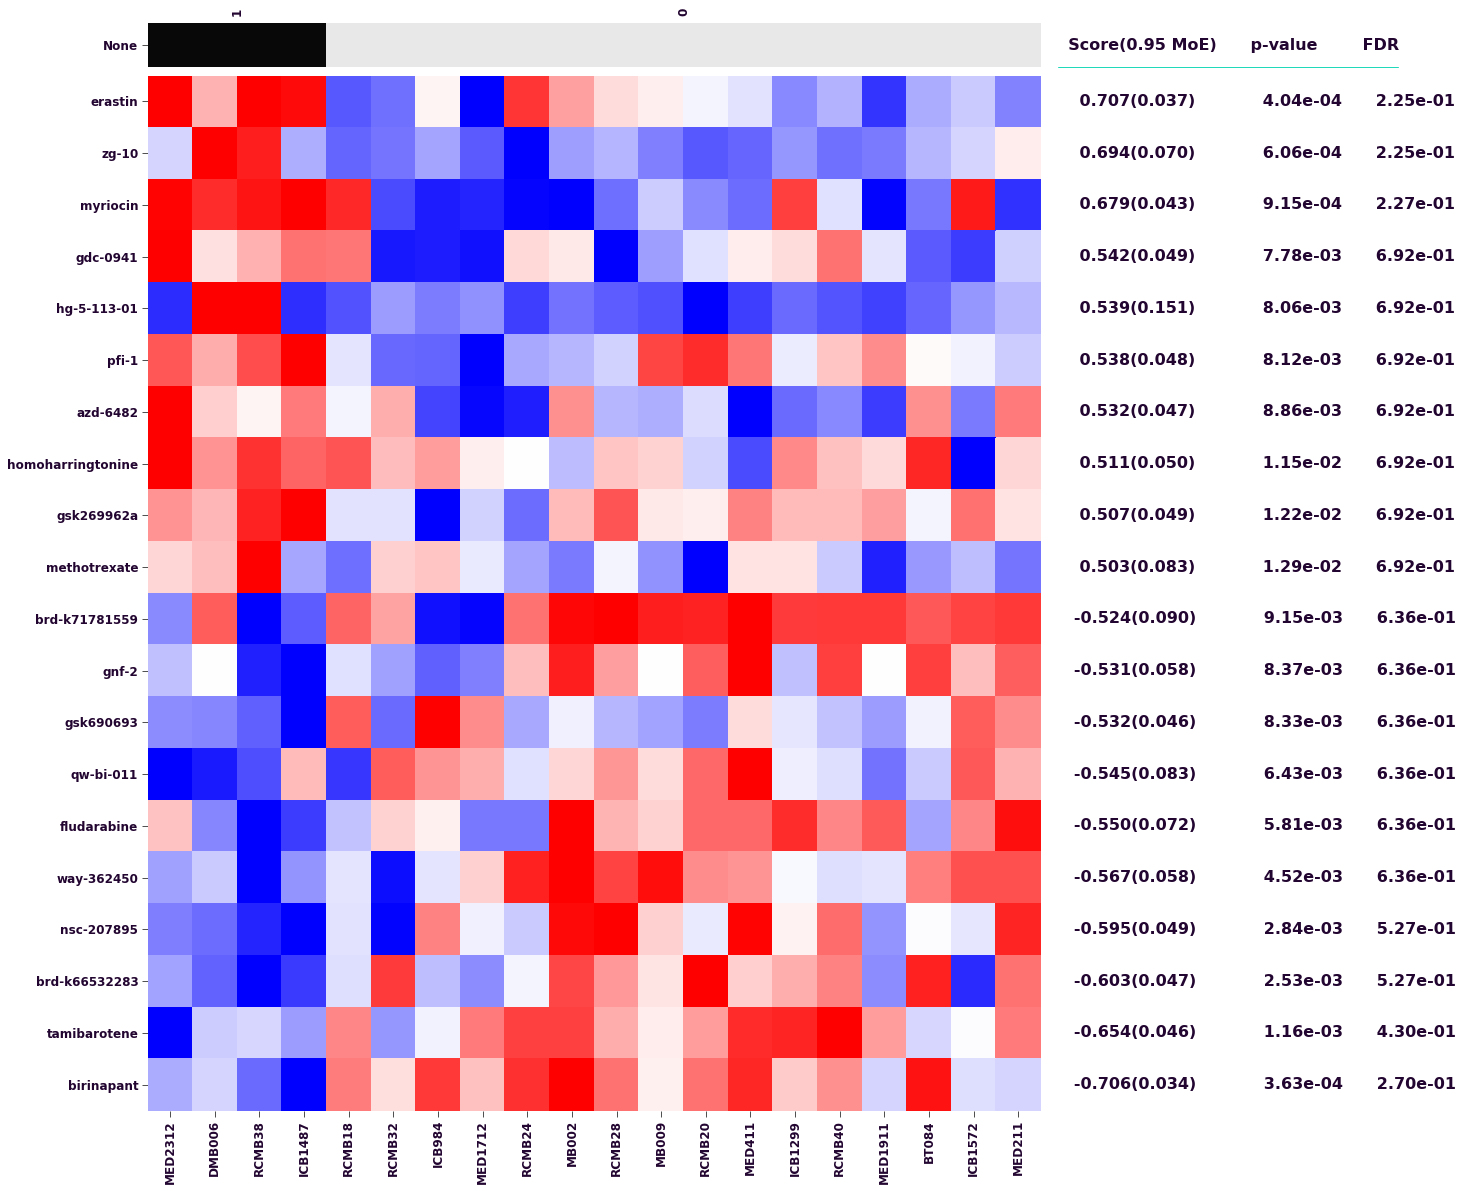

-----
0-->other
1-->G4
-----


FileNotFoundError: [Errno 2] No such file or directory: 'results/drug_scores_for_all_pdx_models.xlsx'

In [9]:
create_subgroup_reports(subgroup='G4', pearson=pearson, number_of_permutations=number_of_permutations)

In [ ]:
create_subgroup_reports(subgroup='SHH', pearson=pearson, number_of_permutations=number_of_permutations)

==> Using Pearson correlation as the "Score"
Dropping 0 axis-1 slices ...
Computing match score with <function custom_pearson_corr at 0x7feaccc8d6a8> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 100 permutations ...
	1/100 ...
	11/100 ...
	21/100 ...
	31/100 ...
	41/100 ...
	51/100 ...
	61/100 ...
	71/100 ...
	81/100 ...
	91/100 ...
	100/100 - done.


No handles with labels found to put in legend.
No handles with labels found to put in legend.


-----------------------------------------------
The PDF of this heatmap can be downloaded here:



-----------------------------------------------
The TXT with the data displayed on the heatmap can be downloaded here:



-----------------------------------------------
done!


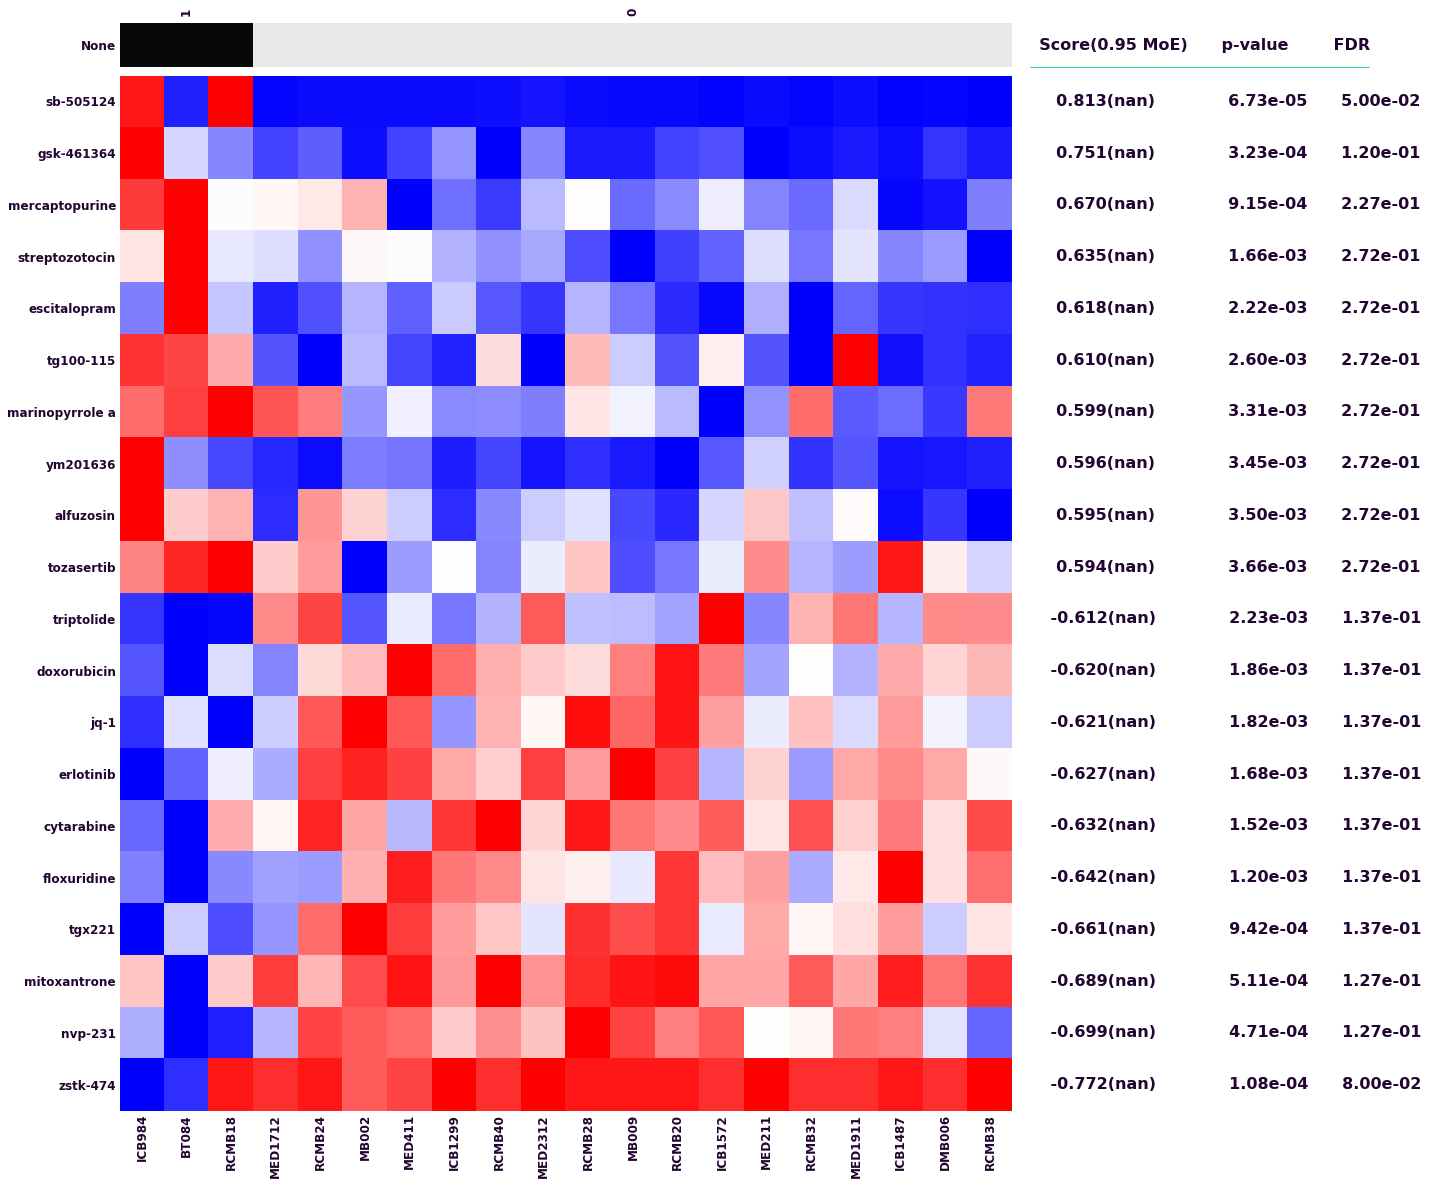

-----
0-->other
1-->SHH+p53
-----


FileNotFoundError: [Errno 2] No such file or directory: 'results/drug_scores_for_all_pdx_models.xlsx'

In [7]:
create_subgroup_reports(subgroup='SHH+p53', pearson=pearson, number_of_permutations=number_of_permutations)

In [10]:
concatenate_subgroup_reports()

Sheet named "G3" added successfully to file named "results/effective_drugs_from_expression.xlsx"!
Sheet named "G4" added successfully to file named "results/effective_drugs_from_expression.xlsx"!
Sheet named "SHH" added successfully to file named "results/effective_drugs_from_expression.xlsx"!
Sheet named "SHH+p53" added successfully to file named "results/effective_drugs_from_expression.xlsx"!
All done!


In [1]:
# Requires GenePattern Notebook: pip install genepattern-notebook
import gp
import genepattern

# Username and password removed for security reasons.
genepattern.display(genepattern.session.register("https://genepattern.broadinstitute.org/gp", "", ""))

GPAuthWidget()